In [1]:
import monai
import numpy as np

import matplotlib.pyplot as plt

/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/ahmet_timur_label/21 t1_mprage_tra_p2_iso.nrrd

/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/ahmet_timur_label/Segmentation.seg.nrrd

In [2]:
path_to_nrrd_image = input("Please enter the path to the .nrrd file below\n")
path_to_nrrd_image_label = input("Please enter the path to the label of previous .nrrd file below\n")

Please enter the path to the .nrrd file below
/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/ahmet_timur_label/21 t1_mprage_tra_p2_iso.nrrd
Please enter the path to the label of previous .nrrd file below
/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/ahmet_timur_label/Segmentation.seg.nrrd


In [3]:
from monai.data import NrrdReader

print(NrrdReader.__doc__)


    Load NRRD format images based on pynrrd library.

    Args:
        channel_dim: the channel dimension of the input image, default is None.
            This is used to set original_channel_dim in the metadata, EnsureChannelFirstD reads this field.
            If None, `original_channel_dim` will be either `no_channel` or `0`.
            NRRD files are usually "channel first".
        dtype: dtype of the data array when loading image.
        index_order: Specify whether the returned data array should be in C-order (‘C’) or Fortran-order (‘F’).
            Numpy is usually in C-order, but default on the NRRD header is F
        kwargs: additional args for `nrrd.read` API. more details about available args:
            https://github.com/mhe/pynrrd/blob/master/nrrd/reader.py

    


In [4]:
reader = NrrdReader(
    channel_dim = None, # I have no idea about the channel order, lets go with default
    dtype = np.float32,
    index_order = 'F' # similarly I don't know about this
)

In [5]:
image = reader.read(
    data = path_to_nrrd_image
)

# Header information is also stored via its attribute
print(image.header)

print(type(image.array))

We can see that **space directions** and **space origin** are given in the headers, this will help us to oriantate the image. This process is already implemented by a transform in monai which uses headers.

In [18]:
from monai import transforms

print(transforms.LoadImage.__doc__)


    Load image file or files from provided path based on reader.
    If reader is not specified, this class automatically chooses readers
    based on the supported suffixes and in the following order:

        - User-specified reader at runtime when calling this loader.
        - User-specified reader in the constructor of `LoadImage`.
        - Readers from the last to the first in the registered list.
        - Current default readers: (nii, nii.gz -> NibabelReader), (png, jpg, bmp -> PILReader),
          (npz, npy -> NumpyReader), (nrrd -> NrrdReader), (DICOM file -> ITKReader).

    Please note that for png, jpg, bmp, and other 2D formats, readers often swap axis 0 and 1 after
    loading the array because the `HW` definition for non-medical specific file formats is different
    from other common medical packages.

    See also:

        - tutorial: https://github.com/Project-MONAI/tutorials/blob/master/modules/load_medical_images.ipynb

    


In [9]:
image, image_data = transforms.LoadImage(
    reader = NrrdReader
)(path_to_nrrd_image)

label, label_data = transforms.LoadImage(
    reader = NrrdReader
)(path_to_nrrd_image_label)

image shape: (232, 256, 176)
label shape: (232, 256, 176)


<Figure size 2400x600 with 0 Axes>

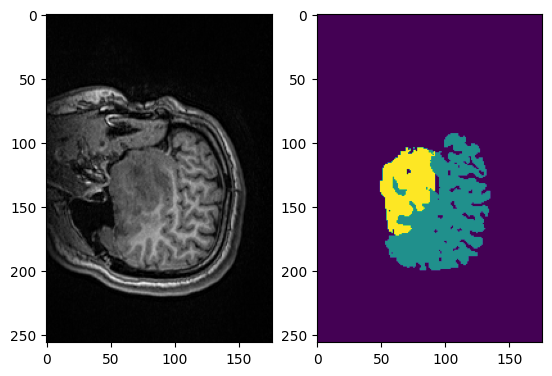

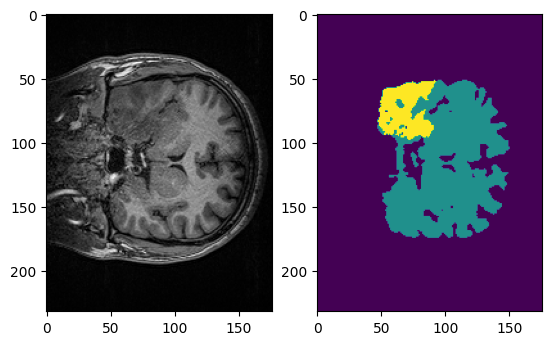

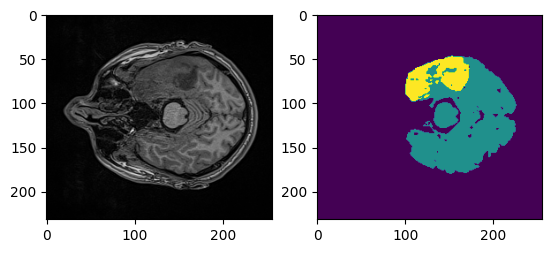

In [21]:
print(f"image shape: {image.array.shape}")
print(f"label shape: {label.array.shape}")
plt.figure("image", (24, 6))

# plot T1 modality
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image.array[60, :, :], cmap="gray")
axs[1].imshow(label.array[60, :, :])
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(image.array[:, 120, :], cmap="gray")
axs[1].imshow(label.array[:, 120, :])
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(image.array[:, :, 60], cmap="gray")
axs[1].imshow(label.array[:, :, 60])

plt.show()